In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as font_manager
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [3]:
# backround color
background_color='#181818'

# import font style
font_path_1 = 'E:\Project\Football\Shotmap Chart\Font\Arvo-Bold.ttf'
font_path_2 = 'E:\Project\Football\Shotmap Chart\Font\Arvo-Regular.ttf'
font_path_3 = 'E:\Project\Football\Shotmap Chart\Font\TrainOne-Regular.ttf'
font_prop_1 = font_manager.FontProperties(fname=font_path_1)
font_prop_2 = font_manager.FontProperties(fname=font_path_2)
font_prop_3 = font_manager.FontProperties(fname=font_path_3)

In [4]:
# open image
def open_image(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

image = open_image('E:\Project\Football\Shotmap Chart\FC_Bayern_München_logo_(2017).svg.png')

In [5]:
df = pd.read_csv('E:\Project\Football\Shotmap Chart\lewandowski_all_shots_2020-2021.csv')

In [6]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,378394,4,BlockedShot,0.914,0.566,0.462338,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
1,378396,12,BlockedShot,0.852,0.396,0.094446,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
2,378399,20,MissedShots,0.861,0.418,0.120521,Robert Lewandowski,h,227,OpenPlay,2020,LeftFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
3,378401,30,Goal,0.885,0.500,0.757777,Robert Lewandowski,h,227,Penalty,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,NaN,Standard
4,379517,69,MissedShots,0.888,0.684,0.047641,Robert Lewandowski,a,227,OpenPlay,2020,RightFoot,14189,Hoffenheim,Bayern Munich,4,1,2020-09-27 13:30:00,Leroy Sané,BallTouch


In [7]:
# since the x and y points are between 0 and 1, we need to multiply each point by 100, so we can map it into the pitch
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [8]:
# calculate total shots
total_shots = df.shape[0]

# calculate shots using right foot
right_shots = df[df['shotType'] == 'RightFoot'].shape[0]

# calculate shots using left foot
left_shots = df[df['shotType'] == 'LeftFoot'].shape[0]

# calculate shots using heading
heading = df[df['shotType'] == 'Head'].shape[0]

# calculate other shots
other_shots = total_shots - right_shots - left_shots - heading

# calculate total goals
total_goals = df[df['result'] == 'Goal'].shape[0]

# calculate total xG
total_xG = df['xG'].sum()

# calculate xG per shot
xG_per_shot = total_xG / total_shots

# calculate the average distance of shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

In [ ]:
# make vertical pitch

pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

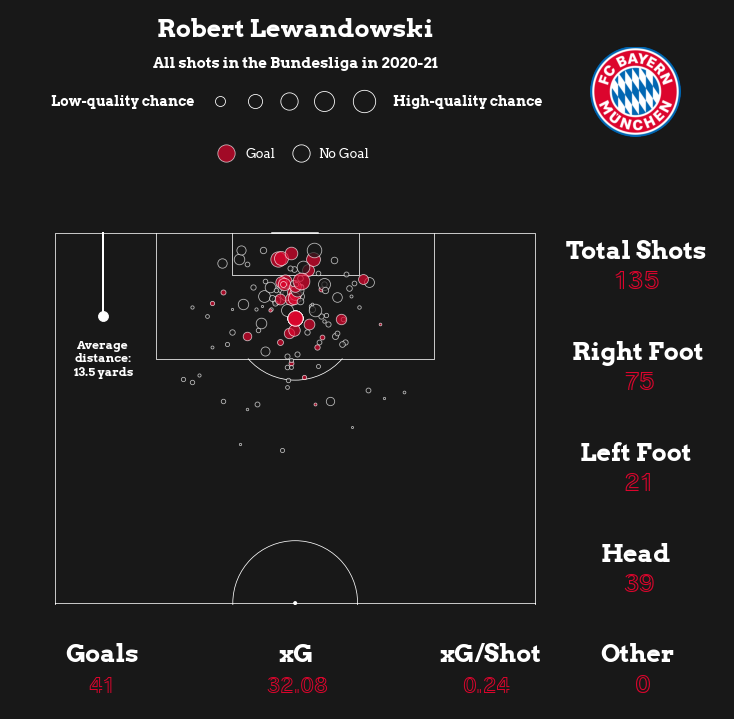

In [10]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 14))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Robert Lewandowski', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Bundesliga in 2020-21', 
    fontsize=15,
    fontweight='bold',
    fontproperties=font_prop_1, 
    color='white', 
    ha='center'
)

# text 'Low-quality chance'
ax1.text(
    x=0.20, 
    y=0.51, 
    s=f'Low-quality chance', 
    fontsize=14, 
    fontproperties=font_prop_1, 
    color='white', 
    ha='center'
)

# scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.43, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.49, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.55, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.62, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

# text 'High-quality chance'
ax1.text(
    x=0.80, 
    y=0.51, 
    s=f'High-quality chance', 
    fontsize=14, 
    fontproperties=font_prop_1, 
    color='white', 
    ha='center'
)

# Goal and no goal symbols
ax1.scatter(
    x=0.38, 
    y=0.27, 
    s=300, 
    color='#dc052d', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)

ax1.text(
    x=0.465, 
    y=0.25, 
    s=f'Goal', 
    fontsize=13, 
    fontproperties=font_prop_2, 
    color='white', 
    ha='right'
)


ax1.scatter(
    x=0.51, 
    y=0.27,
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.54, 
    y=0.25,
    s=f'No Goal', 
    fontsize=13, 
    fontproperties=font_prop_2, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()


# maping each shot into the pitch
ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 8, 
    s=f'Average\ndistance:\n{actual_average_distance:.1f} yards', 
    fontsize=12, 
    fontproperties=font_prop_1, 
    color='white', 
    ha='center'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='#dc052d' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

# the stats
ax3 = fig.add_axes([0, .2, 1.25, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1.25)
ax3.set_ylim(0, 1)


ax3.text(
    x=0.1, 
    y=1.0, 
    s='Goals', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.14, 
    y=0.4, 
    s=f'{total_goals}', 
    fontsize=20, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=0.47, 
    y=1.0, 
    s='xG', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.45, 
    y=0.4, 
    s=f'{total_xG:.2f}', 
    fontsize=20, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=0.75, 
    y=1.0, 
    s='xG/Shot', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.79, 
    y=0.4, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=20, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=0.97, 
    y=9.0, 
    s='Total Shots', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=1.05, 
    y=8.4, 
    s=f'{total_shots}', 
    fontsize=23, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=0.98, 
    y=7.0, 
    s='Right Foot', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=1.07, 
    y=6.4, 
    s=f'{right_shots}', 
    fontsize=23, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=0.995, 
    y=5.0, 
    s='Left Foot', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=1.07, 
    y=4.4, 
    s=f'{left_shots}', 
    fontsize=23, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=1.03, 
    y=3.0, 
    s='Head', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=1.07, 
    y=2.4, 
    s=f'{heading}', 
    fontsize=23, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.text(
    x=1.03, 
    y=1.0, 
    s='Other', 
    fontsize=25, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=1.09, 
    y=0.4, 
    s=f'{other_shots}', 
    fontsize=23, 
    fontproperties=font_prop_3, 
    color='#dc052d', 
    ha='left'
)

ax3.set_axis_off()

# club badge
ax4 = fig.add_axes([0, 0.77, 2.18, .09])
ax4.imshow(image)

ax4.set_axis_off()


In [11]:
fig.savefig('E:\Project\Football\Shotmap Chart\shotmap_chart.png', facecolor=background_color, bbox_inches='tight')